<a href="https://colab.research.google.com/github/pdrothyago/projetos_data_science/blob/master/projeto1_Analisando_dados_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Análise dos Dados do Airbnb - *Buenos Aires*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Buenos Aires, capial e maior cidade da Argentina, e ver quais insights podem ser extraídos a partir de dados brutos.**

#Obtenção dos dados

Para uma análise exploratória incial, os dados usados neste projeto foram todos adquiridos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise inicial, será baixado somente o arquivo `listing.csv`, pois é um arquivo com resumos simples das informações e boa para visualização.

In [0]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listing.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2020-04-26/visualisations/listings.csv")

# Análise dos Dados

Neste momento é feito um estudo e uma observação dos dados obtidos para se desenvolver uma consciência da situação inicial e para assim ter um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel;
* `name` - nome da propriedade anunciada;
* `host_id` - número de id do proprietário (anfitrião) da propriedade;
* `neighbourhood_group` - esta coluna não contém nenhum valor;
* `neighbourhood` - nome do bairro;
* `latitude` - coordenada da latitude da propriedade;
* `longitude` - coordenada da longitude da propriedade;
* `roon_type` - informa o tipo de quarto que é oferecido:
* `price` - preço para alugar o imóvel;
* `minimum_nights` - quantidade mínima de noites para reservar;
* `number_of_reviews` - número de reviews que a propriedade possui;
* `last_review` - data do último rewiew;
* `reviews_per_month` - quantidade de reviews por mês;
* `calculated_host_listing_count` - quantidade de imóvel do mesmo anfitrião;
* `availability_365` - número de dias de disponibilidade dentro de 365 dias.

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [0]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,3983,2,26,2019-11-28,0.27,1,365
1,12463,Room in Recoleta - awesome location,48799,Matt,NaN,Recoleta,-34.59761,-58.39468,Private room,1593,1,20,2017-12-11,0.16,1,365
2,13095,Standard Room at Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59382,-58.42994,Private room,2987,1,1,2018-12-18,0.06,7,365
3,13096,Standard Room in Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59398,-58.42853,Private room,2987,1,0,NaN,NaN,7,365
4,13097,Standard Room at Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,2987,1,66,2019-11-27,1.89,7,365


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Daremos proseguimento identicando a quantidade de entradas que o nosso conjunto de dados possui e verificar o tipo de cada coluna.

Conforme ja foi dito, esse dataset que estamos usando é a versão resumida, a versão mais simples e que é boa para a vizualização. Porém, na mesma [página]("http://insideairbnb.com/get-the-data.html") que obtivemos o arquivo `listing.csv` pode ser encontrado uma versão mais completa.

In [0]:
# identificar o volume de dados do DataFrame
print ("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 23729
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no dataset?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo se esses valores são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes;
* As variáveis `reviews_per_month`e `last_review`possuem quase 30% de valores nulos;
* Ja a variável `name` tem aproximadamente 0,5% e a variável `host_name`tem aproximadamente 0,1% dos valores nulos.

In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.274221
last_review                       0.274221
name                              0.000421
host_name                         0.000126
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**

Como o objetivo neste ponto é ilustrar como estão distribuida as variáveis, uma boa opção é a contrução de histogramas, uma vez que nos auxiliam a compreender um extenso conjunto de dados.

De acordo com o site [FM2S]("https://www.fm2s.com.br/histograma/"), um histograma nos permitirá obter informações como a **centrabilidade** (onde é o centro de distribuição), **amplitude** (qual o ponto máximo e o mínimo) e a **simetria** (se podemos esperar a mesma frequência de pontos com valores altos e baixos).

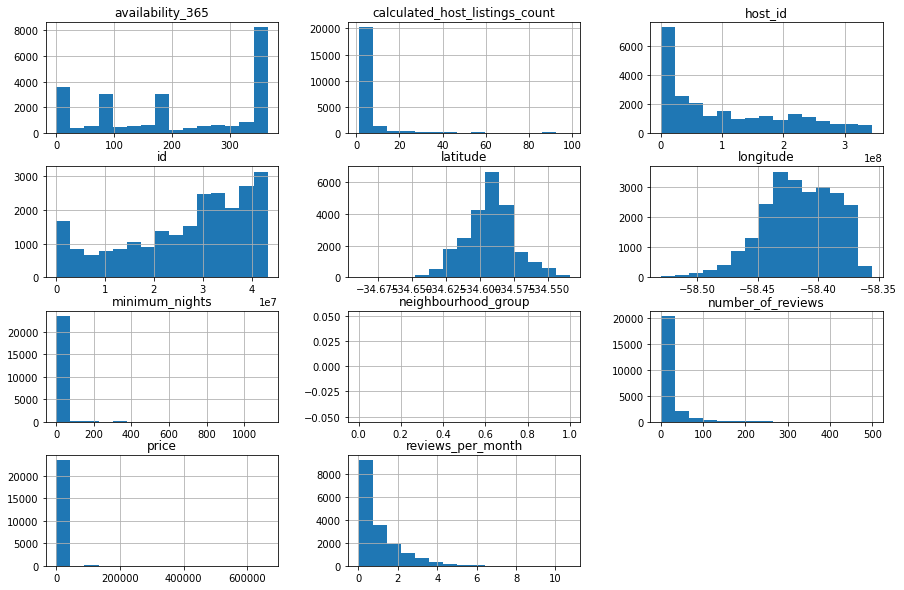

In [0]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

Observando os histogramas percebe-se uma grande quantidades de *outlies*, ou seja, dados que podem prejudicar a nossa analise, dados fora da realidade.  Podemos citar por exemplo as variáveis `price`,`minimum_nights` e `calculated-host_listings_count`.

Para melhorar a nossa capacidade de análise, vamos fazer uma "limpeza" no nosso *datasets*.

Mas primeiro, podemos eliminar algumas variáveis que são do nosso interesse fazendo um resumo estatístico por meio do método `describe()`.

In [0]:
# ver resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,23729.000000,23729.000000,23729.00000,17222.000000,23729.000000,23729.000000
mean,4014.875595,6.027519,16.31333,1.053696,6.272704,209.383750
std,16075.326378,25.635455,32.32226,1.158269,14.675388,137.991373
min,0.000000,1.000000,0.00000,0.010000,1.000000,0.000000
25%,1394.000000,1.000000,0.00000,0.230000,1.000000,89.000000
50%,2124.000000,3.000000,4.00000,0.640000,1.000000,180.000000
75%,3319.000000,4.000000,18.00000,1.470000,4.000000,363.000000
max,663732.000000,1125.000000,500.00000,10.730000,99.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:
* A variável `price` possui 75% do valor abaixo de 3319 quando o valor máximo apresentado é 663732;
* A quantidade mínima de noites (´minumun_nights`) está acima de 365 dias no ano.

Identificamos as *outlies* nas variáveis `price` e `minimum_nigths`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

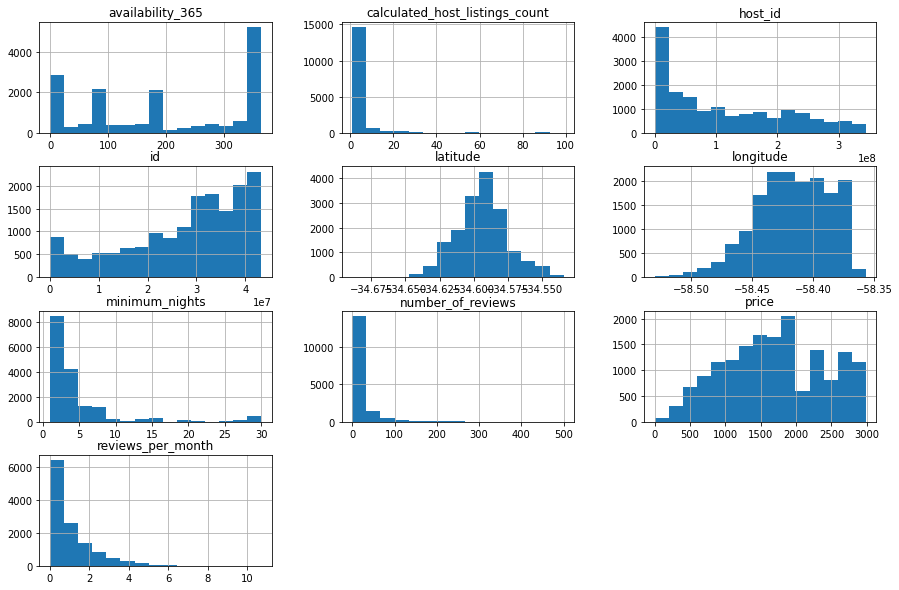

In [0]:
# remover os *outlies* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 3000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

Depois de remover os *outlies* podemos ter uma noção de quanto em média custa um aluguel em Buenos Aires.

In [0]:
# ver amédia da coluna "price"
df_clean.price.mean()

1704.1242326627362

### **Q5. Qual a correlação existente entre as variáveis?**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando realção ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é a função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:
* criar uma matriz de corelação
* Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn.

In [0]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count','availability_365']].corr()

# mostrar a matriz de correlaçao
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.017522,0.096254,0.108616,0.113502,0.157798
minimum_nights,-0.017522,1.000000,-0.099736,-0.147916,0.106668,0.042540
number_of_reviews,0.096254,-0.099736,1.000000,0.636707,-0.032183,0.078380
reviews_per_month,0.108616,-0.147916,0.636707,1.000000,-0.061167,-0.006801
calculated_host_listings_count,0.113502,0.106668,-0.032183,-0.061167,1.000000,0.088656
availability_365,0.157798,0.042540,0.078380,-0.006801,0.088656,1.000000


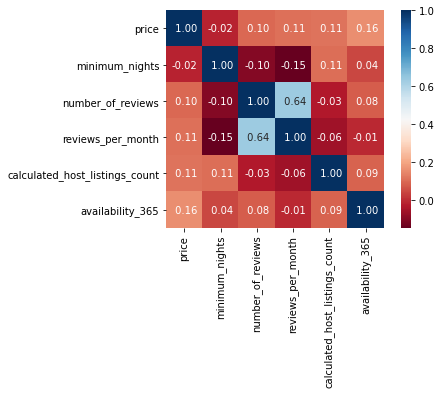

In [0]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt=' .2f', square=True, linecolor='white', annot=True)

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

Os hosts do Airbnb podem diponibilizar alguns tipos de imóveis para aluguel, que podem ser identificados na coluna `room_types`:
* Entire home/apartments - toda a casa ou todo o apartamento;
* Private room - um quarto privado;
* Shared room -  um quarto compartilhado;
* hotel room - um quarto de hotel.


In [0]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    11756
Private room        4025
Shared room          517
Hotel room           155
Name: room_type, dtype: int64

In [0]:
# mostar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.714520
Private room       0.244636
Shared room        0.031423
Hotel room         0.009421
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara de Buenos Aires?**

Buenos Aires, assim como toda grande cidade, apresenta diversos lugares cada um com sua peculiariedade. Sejam bairros redencias próximos aos lugares mais importantes ou até mesmo distante, bairros alternativos, bairros luxuosos, centro, etc. 

E podemos verificar qual bairro apresenta o valor mais em conta para se hospedar em Buenos Aires ou o mais caro para quem se deseja mais mordomia. Uma maneira de se verificar isso é através do método `groupby()`, que **verifica uma variável em função da outra**. No caso iremos comparar os bairros a partir do preço da locação.

In [0]:
# ver preços por bairos, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Villa Soldati    2655.000000
Puerto Madero    1965.927273
Palermo          1908.246533
Retiro           1870.121365
Versalles        1831.900000
Recoleta         1823.833132
San Nicolas      1763.381136
San Telmo        1720.378026
Nuñez            1698.121739
Belgrano         1681.773196
Name: price, dtype: float64

In [35]:
# ver os bairros que mais recebem reviews por mês
df_clean.groupby(['neighbourhood']).reviews_per_month.mean().sort_values(ascending=False)[:10]

neighbourhood
San Nicolas          1.485322
Palermo              1.284780
Retiro               1.278394
Puerto Madero        1.221220
Monserrat            1.149092
Villa Luro           1.140909
Recoleta             1.134184
San Telmo            1.094587
Villa Gral. Mitre    1.087059
Villa Crespo         1.080059
Name: reviews_per_month, dtype: float64

Os bairros de San Nicolas e Palermo são os que mais recebem reviews por mês. 

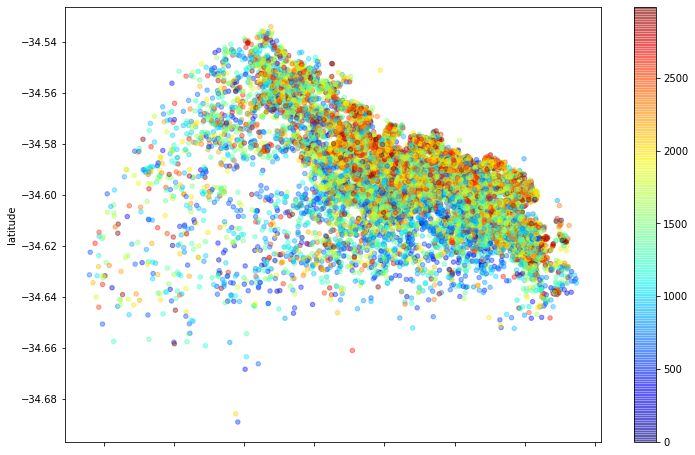

In [0]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], cmap=plt.get_cmap('jet'), figsize=(12,8));

No gráfico acima vemos onde estão localizados a maioria dos imóves alugados.

### **Q8. Qual a média do mínimo de noites para aluguel (minimun_nights)?**

In [0]:
# ver a média da coluna `minimum_nights`
df_clean.minimum_nights.mean()


4.212058591138394

Podemos ver que a média do mínimos de noites alugados é aproximadamente de 4 dias.

### **Conclusão**
Neste projeto fizemos a análise dos dados disponibilizado pelo Inside Airbnb da cidade de Buenos Aires. A princípio podemos perceber que nem sempre os *datasets* vêm completo, ou seja, existem valores ausentes como nos `neighbourhood`. Ainda mais, depois de plotarmos os histogramas percebemos a presença de *outlies* que 
prejudicariam a nossa análise. Por fim, depois de eliminar colunas que não nos interresariam e corrigir os *outlies*, podemos analisar o valor dos alugues por bairro e a diposição dos imóveis na cidade de Buenos Aires, bem como a quantidade mínima de noites reservadas.

**Este projeto foi desenvolvido como parte do módulo 1 do curso de Data Science na Prática do site [Sigmoidal](https://sigmoidal.ai/), criado e idealizado por [Carlos Melo](https://www.linkedin.com/in/carlosfab/).**